In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.14231152973933592, pvalue=0.7061102702795024)
Test: f_t, p_value_t -6.449E+00 2.124E-10
ANOVA: f, p_value: 4.159E+01 2.124E-10
--------------------------------------------------------------------------------


Group1:  [82 52 90 71 75 65 89 91 80 91 50 79 72 81 63 73 87 66 83 78 71 31 64 76
 95 74 63 73 91 86 85 73 58 69 96 83 96 77 74 82 76 60 79 80 81 81 60 50
 77 71 66 73 62 76 92 81 84 70 74 41 84 84 78 79 72 77 61 52 68 85 64 75
 65 76 61 77 78 60 69 74 76 70 68 78 89 60 49 58 70 68 76 73 82 76 90 92
 80 76 75 69 68 63 83 62 94 93 82 81 78 64 81 66 75 62 60 30 72 73 79 78
 78 78 68 76 64 95 83 79 85 72 78 74 88 87 76 88 71 79 78 62 73 94 82 66
 63 76 78 73 61 93 64 71 88 74 34 76 70 89 81 40 70 70 85 64 79 99 90 64
 76 96 58 78 78 84 79 79 81 80 90 70 98 62 88 63 89 73 71 67 88 68 70 84
 76 95 71 69 55 69 58 76 72 77 85 70 67 71 80 87 81 89 84 65 7

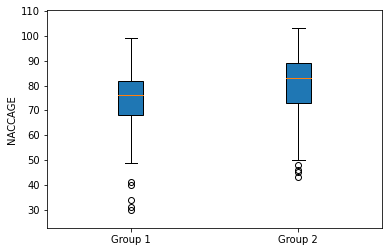

************************************************************************************************************************





Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.6514334113543974, pvalue=0.41988000031904904)
Test: f_t, p_value_t -5.170E+00 3.066E-07
ANOVA: f, p_value: 2.673E+01 3.066E-07
--------------------------------------------------------------------------------


Group1:  [79 51 80 67 71 64 86 82 74 84 47 76 71 80 61 67 83 65 82 72 61 29 63 73
 85 72 58 70 83 83 79 65 56 65 91 79 93 73 73 72 71 59 76 74 78 72 59 47
 74 65 65 70 61 71 88 75 73 69 71 35 81 82 73 70 70 74 60 51 63 82 63 72
 63 74 58 70 77 59 68 70 73 69 67 75 84 59 47 57 66 66 74 68 78 75 78 86
 78 75 72 68 67 61 80 59 91 90 79 78 77 62 80 65 73 61 59 28 66 71 75 75
 76 75 67 70 62 84 76 74 78 69 76 72 86 83 69 87 70 75 75 61 68 86 73 64
 60 73 74 70 57 86 62 70 87 72 28 71 68 85 69 39 68 66 83 63 78 90 78 59
 72 85 5

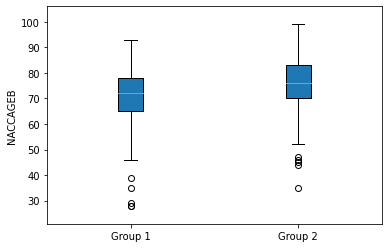

************************************************************************************************************************





Feature:  NACCVASC


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.717122959303379, pvalue=0.39738414580714787)
Test: f_t, p_value_t -7.187E-01 4.726E-01
ANOVA: f, p_value: 5.165E-01 4.726E-01
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

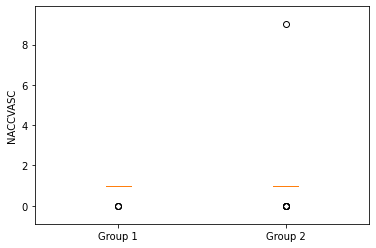

************************************************************************************************************************





Feature:  NACCDAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.5882457053010715, pvalue=0.44336178142744853)
Test: f_t, p_value_t -4.785E+00 2.092E-06
ANOVA: f, p_value: 2.290E+01 2.092E-06
--------------------------------------------------------------------------------


Group1:  [89 53 91 75 75 69 95 94 83 93 55 84 80 85 65 79 88 68 90 85 73 41 65 80
 97 78 65 78 92 92 87 76 64 75 98 86 100 84 74 87 83 63 84 83 82 84 64 55
 84 72 70 80 65 79 94 87 84 76 79 43 94 88 85 82 78 83 64 56 72 88 72 78
 65 78 64 78 84 64 73 75 83 79 72 82 90 67 54 64 71 72 82 73 87 85 92 92
 86 79 84 70 71 67 89 65 99 96 85 89 80 70 85 70 77 65 63 35 75 75 81 86
 86 81 74 78 65 96 84 85 91 76 80 82 95 90 81 96 82 81 80 67 82 99 86 69
 69 79 81 74 64 94 69 74 96 76 39 76 77 96 82 44 76 77 90 67 89 102 90 68
 79 99

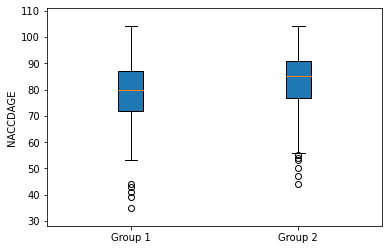

************************************************************************************************************************





Feature:  ALCDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=37.170302988617586, pvalue=1.80518955756399e-09)
Test: f_t, p_value_t -7.187E+00 2.568E-12
ANOVA: f, p_value: 3.717E+01 2.568E-12
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

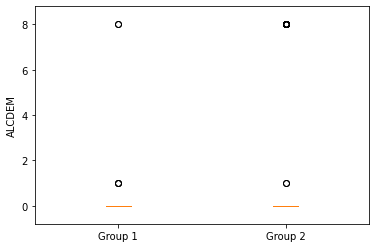

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=32.90313672639143, pvalue=1.4522112812302188e-08)
Test: f_t, p_value_t 9.309E+00 3.046E-19
ANOVA: f, p_value: 9.083E+01 3.046E-19
--------------------------------------------------------------------------------


Group1:  [8 8 1 8 8 8 1 1 1 1 1 1 8 8 1 8 1 8 1 1 1 1 8 8 1 1 8 8 1 1 1 1 1 8 1 8 1
 8 8 1 1 8 8 0 1 1 8 8 8 8 1 8 8 8 1 1 0 8 1 1 1 8 1 1 8 1 1 8 8 8 8 1 8 1
 8 1 8 8 1 8 1 8 1 1 1 8 8 8 8 1 8 8 1 8 1 1 1 8 8 1 8 1 1 1 1 1 8 8 8 8 1
 8 8 1 1 8 1 1 1 8 1 1 8 8 1 1 8 1 1 1 1 1 1 1 1 8 8 8 8 8 1 1 1 8 8 1 1 1
 8 1 8 1 0 8 1 1 1 8 0 8 8 1 1 8 8 1 1 1 1 1 8 1 8 1 1 8 1 1 1 8 1 0 8 8 8
 8 1 8 1 8 1 8 1 1 1 1 8 1 8 1 1 1 1 8 8 1 1 1 1 8 1 8 1 1 1 8 1 1 8 1 1 8
 8 1 1 8 8 1 1 8 8 8 1 8 1 1 1 8 1 8 1 1 8 8 8 8 1 8 8 1 8 8 8 1 8 1

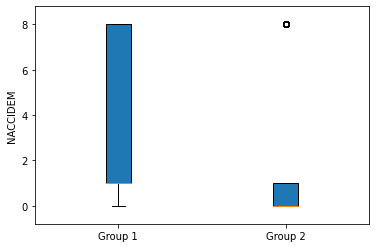

************************************************************************************************************************





Feature:  NPFTDT5


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.98725236326684, pvalue=0.025855984592349456)
Test: f_t, p_value_t -2.642E+00 8.511E-03
ANOVA: f, p_value: 4.987E+00 8.511E-03
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 

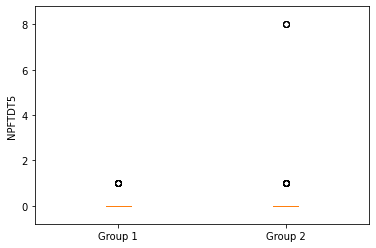

************************************************************************************************************************





Feature:  NACCREAS


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.317752321153176, pvalue=0.03808749197263526)
Test: f_t, p_value_t 2.061E+00 3.979E-02
ANOVA: f, p_value: 4.318E+00 3.979E-02
--------------------------------------------------------------------------------


Group1:  [1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 7 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1
 2 2 1 7 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 2
 1 2 1 1 2 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 7 1 2 1
 2 2 1 2 2 2 1 2 1 1 1 2 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2 1 7 2
 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 2 7 1 2 1 7 7 1 2 2 1 1 1 1 1 2 1 1 1 1 

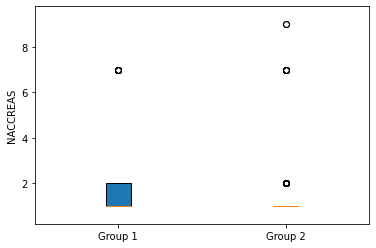

************************************************************************************************************************





Feature:  IMPNOMCI


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=9.555350728214822, pvalue=0.0020742834589585197)
Test: f_t, p_value_t -3.544E+00 4.263E-04
ANOVA: f, p_value: 9.555E+00 4.263E-04
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

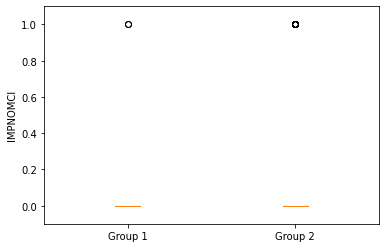

************************************************************************************************************************





Feature:  RACE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.158344784893242, pvalue=0.2821868862085381)
Test: f_t, p_value_t -1.076E+00 2.822E-01
ANOVA: f, p_value: 1.158E+00 2.822E-01
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1


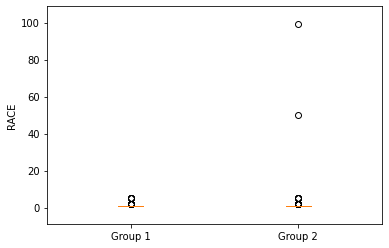

************************************************************************************************************************







In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()